<h1>CNN Using CWT ProcessedSpectra as Inputs</h1>

<p>This notebook is used to train and explore a CNN model that classifies minerals by taking in spectra that have undergone continuous wavelet transformation using a ricker wavelet</p>

In [1]:
import numpy as np
import pandas as pd
import cnnmodelcwt as cnn_cwt
from tensorflow.keras.models import Model

<h1>Use this space below for fiddling with model training</h1>

<p>If you need to retrain the model, be sure to restart the runtime</p>

<h3>Define your Hyperparameters below</h3>

In [2]:
'''define the hyperparameters here!'''
learning_rate=0.001
batch_size=500
drop_rate=0.55
epochs=5

#don't change the line below
hyperparameters=[learning_rate,batch_size,drop_rate,epochs]

In [3]:
'''define other parameters here!'''
#this string is prepended to all output files for identification
id_value='new_test'

#training data file path (do not include /content/drive/My Drive/ML Spectroscopy/)
fin_path=r'Data/CWT Data/Single/'

#output file path for the trained model data
mout_path=r'Model Data/CNN Model/'

#proportion of the training data allocated to the dev set - a float x: 0<x<1
dev_size=0.2

#random seed used for train/dev split to ensure repeatable outcomes. None 
#provides a psuedorandom value that won't be repeatable
r_state=1

#fast - True for doing quick training that does not output probability weights
#for each sample during training. False for doing deep analysis and tracking
fast=True

#threshold - float in the range [0.0,1.0) determines the discrimination threshold
threshold=0


In [4]:
'''train the model'''
cnn_model,train_history,X_val,y_val=cnn_cwt.cwt_cnn_model(fin_path,mout_path,dev_size,r_state,hyperparameters,
                        fast,id_value,threshold=threshold)

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 950, 1)]          0         
_________________________________________________________________
conv1 (Conv1D)               (None, 930, 16)           352       
_________________________________________________________________
bn1 (BatchNormalization)     (None, 930, 16)           64        
_________________________________________________________________
relu1 (LeakyReLU)            (None, 930, 16)           0         
_________________________________________________________________
mpool1 (MaxPooling1D)        (None, 465, 16)           0         
_________________________________________________________________
conv2 (Conv1D)               (None, 455, 32)           5664      
_________________________________________________________________
bn2 (BatchNormalization)     (None, 455, 32)          

c:\users\ntemi\venv-scnn\venv\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=range(0, 15) as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


,pred_0,pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9,pred_10,pred_11,pred_12,pred_13,pred_14
true_0,1951,0,0,6,0,0,0,0,0,0,0,0,0,0,0
true_1,0,1388,0,0,0,0,0,0,0,0,0,0,0,0,0
true_2,0,0,952,53,0,0,0,0,0,0,0,0,0,0,0
true_3,0,0,1,1618,0,0,0,0,0,0,0,0,0,0,0
true_4,0,0,0,1,1222,0,0,0,0,0,0,0,0,0,0
true_5,0,0,0,4,0,1235,0,0,0,0,0,0,0,0,0
true_6,0,0,0,3,0,0,1289,0,0,0,0,0,0,0,0
true_7,0,0,0,0,0,0,0,1123,0,0,0,0,0,0,0
true_8,0,0,0,7,0,0,0,0,1095,0,0,0,0,0,0
true_9,1,1,0,31,0,0,0,0,0,1078,0,0,0,0,0


<h2><b>Test the model</b></h2>

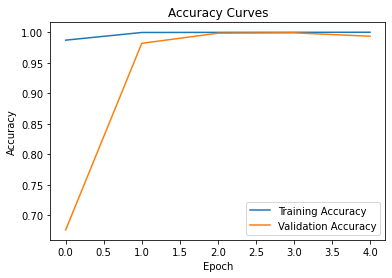

In [5]:
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from pprint import pprint
from IPython.display import clear_output
from sklearn.metrics import roc_curve

train_accuracy = train_history.history['sparse_categorical_accuracy']
train_accuracy_df = pd.DataFrame(train_accuracy)
#train_accuracy_df.to_csv(train_accuracy_path, index = False, header = False)

val_accuracy = train_history.history['val_sparse_categorical_accuracy']
val_accuracy_df = pd.DataFrame(val_accuracy)
#val_accuracy_df.to_csv(val_accuracy_path, index = False, header = False)


plt.plot(train_accuracy, label = 'Training Accuracy')
plt.plot(val_accuracy, label = 'Validation Accuracy')
plt.title('Accuracy Curves')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc = 'best')
plt.show()

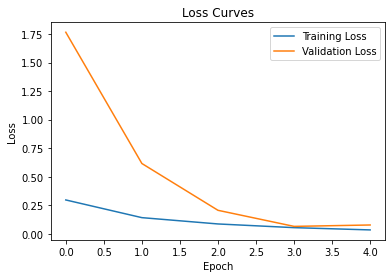

In [6]:
train_loss = train_history.history['loss']
train_loss_df = pd.DataFrame(train_loss)
#train_loss_df.to_csv(train_loss_path, index = False, header = False)

val_loss = train_history.history['val_loss']
val_loss_df = pd.DataFrame(val_loss)
#val_loss_df.to_csv(val_loss_path, index = False, header = False)

plt.plot(train_loss, label = 'Training Loss')
plt.plot(val_loss, label = 'Validation Loss')
plt.title('Loss Curves')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc = 'best')
plt.show()

In [7]:
def plot_confusion_matrix(y_true, y_pred, title, path):
    import matplotlib.pyplot as plt
    labels = np.arange(15)
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_df = pd.DataFrame(cm, columns = labels, index = labels)
    #cm_df.to_csv(path, index = True, header = True)
    cm_df.columns.name = 'Predicted'
    cm_df.index.name = 'Actual'
    fig, ax = plt.subplots(figsize=(13,10))         # Sample figsize in inches
    sn.heatmap(cm_df, annot = True, cmap = 'Blues', fmt = 'd', cbar = False)
    plt.title(title)
    plt.show()

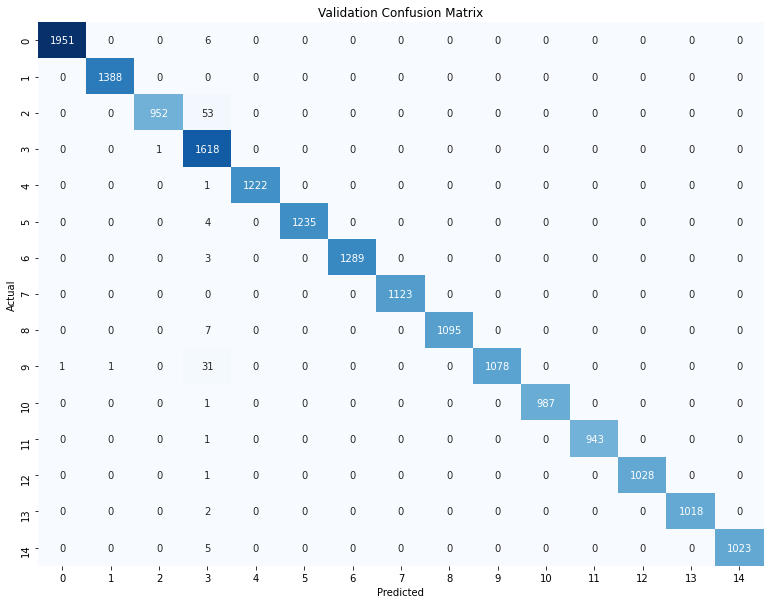

In [8]:
val_cm_path=r'Model Data/CNN Model/CWT/val_confusion_matrix_'+id_value+r'.csv'
plot_confusion_matrix(y_val, np.argmax(cnn_model.predict(X_val), axis = 1), 'Validation Confusion Matrix', val_cm_path)

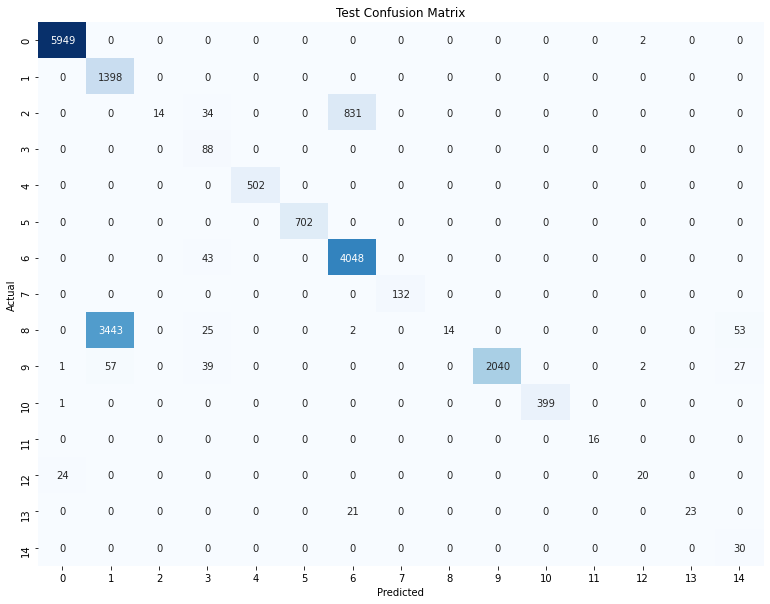

[[0.00348481 0.00227256 0.00144549 ... 0.00158525 0.00181439 0.00206386]
 [0.01905875 0.01444227 0.006743   ... 0.01454201 0.02302877 0.01465756]
 [0.00475599 0.00356846 0.00175185 ... 0.00271959 0.00244115 0.00216328]
 ...
 [0.00472884 0.00220257 0.00298128 ... 0.00298933 0.0010647  0.00230471]
 [0.00377695 0.00214202 0.00167626 ... 0.00245576 0.00090526 0.00217807]
 [0.004958   0.00259733 0.00188929 ... 0.00293088 0.0009755  0.00284069]]


In [9]:
testin_path=r'Data/CWT Data/Mixed/Test Set/'
test_cm_path=r'Model Data/CNN Model/CWT/test_confusion_matrix_'+id_value+r'.csv'

import helper as h
#build test set, drops samples with Null values
test_df=h.dfbuilder(testin_path,split_df=False,dev_size=0.2,r_state=1,raw=True)


#separates features and labels
y_test=test_df[test_df.columns[-1]]
X_test=test_df.drop(test_df.columns[-1],axis=1).values


plot_confusion_matrix(y_test, np.argmax(cnn_model.predict(X_test), axis = 1), 'Test Confusion Matrix', test_cm_path) 
print(cnn_model.predict(X_test))

In [10]:
print(classification_report(y_test, np.argmax(cnn_model.predict(X_test), axis = -1)))

cr = classification_report(y_test, np.argmax(cnn_model.predict(X_test), axis = -1), output_dict = True)
cr_df = pd.DataFrame(cr).transpose()
#cr_df.to_csv(cr_path, index = True, header = True)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5951
           1       0.29      1.00      0.44      1398
           2       1.00      0.02      0.03       879
           3       0.38      1.00      0.56        88
           4       1.00      1.00      1.00       502
           5       1.00      1.00      1.00       702
           6       0.83      0.99      0.90      4091
           7       1.00      1.00      1.00       132
           8       1.00      0.00      0.01      3537
           9       1.00      0.94      0.97      2166
          10       1.00      1.00      1.00       400
          11       1.00      1.00      1.00        16
          12       0.83      0.45      0.59        44
          13       1.00      0.52      0.69        44
          14       0.27      1.00      0.43        30

    accuracy                           0.77     19980
   macro avg       0.84      0.80      0.71     19980
weighted avg       0.91   

c:\users\ntemi\venv-scnn\venv\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass pos_label=0 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


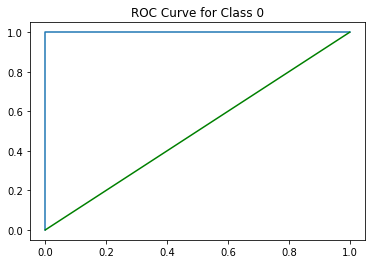

c:\users\ntemi\venv-scnn\venv\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass pos_label=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


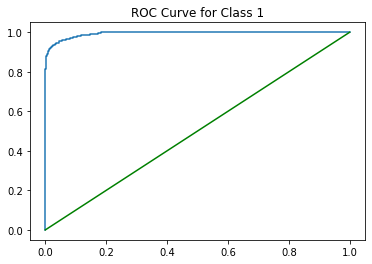

c:\users\ntemi\venv-scnn\venv\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass pos_label=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


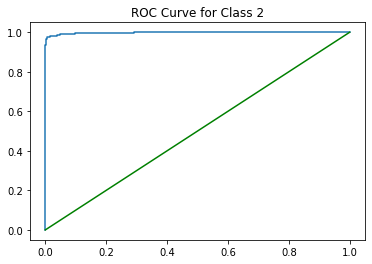

c:\users\ntemi\venv-scnn\venv\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass pos_label=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


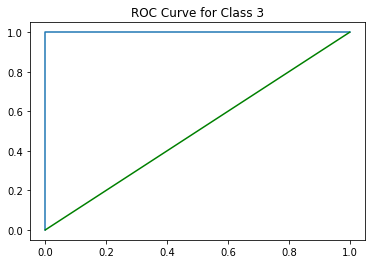

c:\users\ntemi\venv-scnn\venv\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass pos_label=4 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


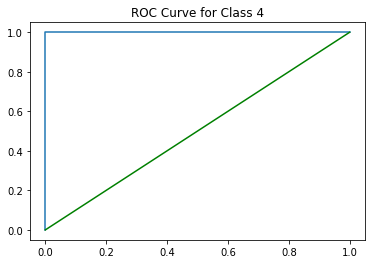

c:\users\ntemi\venv-scnn\venv\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass pos_label=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


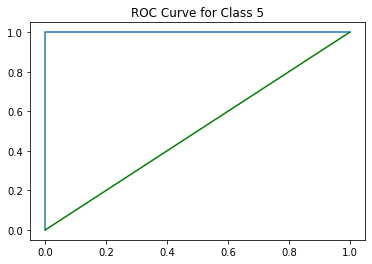

c:\users\ntemi\venv-scnn\venv\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass pos_label=6 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


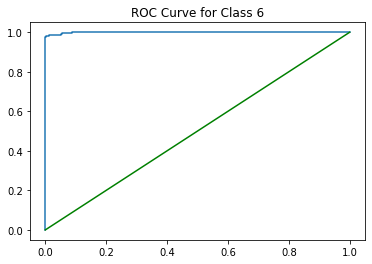

c:\users\ntemi\venv-scnn\venv\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass pos_label=7 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


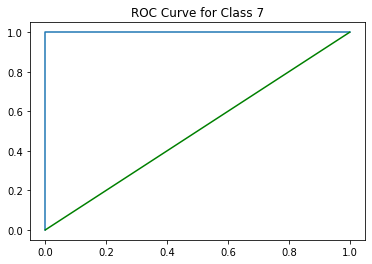

c:\users\ntemi\venv-scnn\venv\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass pos_label=8 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


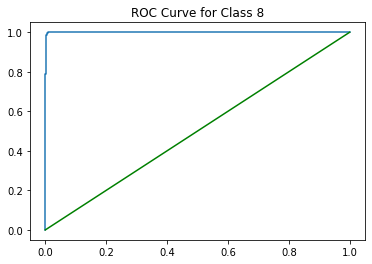

c:\users\ntemi\venv-scnn\venv\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass pos_label=9 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


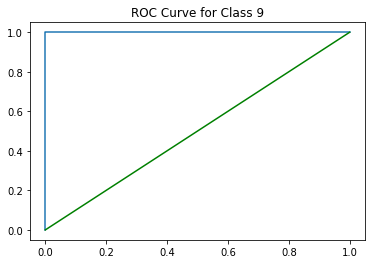

c:\users\ntemi\venv-scnn\venv\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass pos_label=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


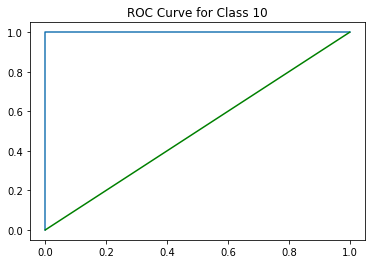

c:\users\ntemi\venv-scnn\venv\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass pos_label=11 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


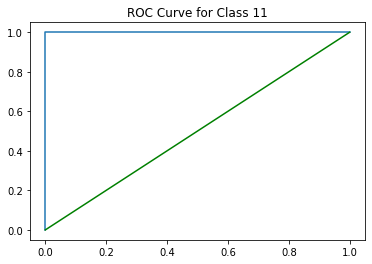

c:\users\ntemi\venv-scnn\venv\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass pos_label=12 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


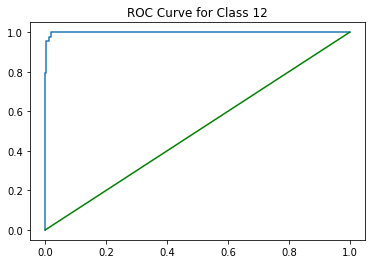

c:\users\ntemi\venv-scnn\venv\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass pos_label=13 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


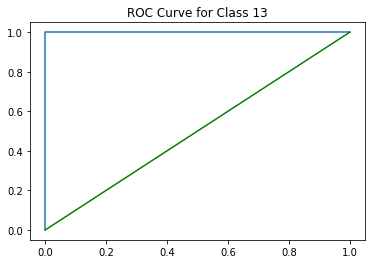

c:\users\ntemi\venv-scnn\venv\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass pos_label=14 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


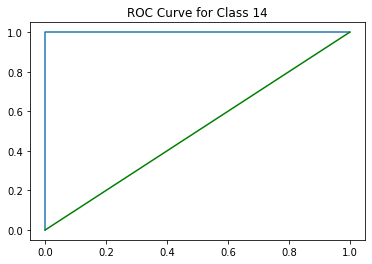

In [11]:
roc_out=h.roc_all(cnn_model.predict(X_test),y_test)
roc_out.to_csv(mout_path+id_value+'roc_data.csv')